In [1]:
from keras.preprocessing import image

/home/sam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2 as cv

In [4]:
PATH = "/home/sam/Downloads/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/"

In [10]:
dude = image.load_img("/home/sam/Downloads/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0130.jpg")

In [5]:
import os

In [39]:
files = os.listdir(PATH)
width = []
height = []
count = 0
corruptedCount = 0
for file in files:
    if file[-3:] == "jpg":
        try: 
            file = image.load_img(PATH + file)
            width.append(file.width)
            height.append(file.height)
            count += 1
        except:
            corruptedCount += 1

print("Found", count, "usable images and", corruptedCount)

Found 2042 usable images and 81


In [ ]:
plt.hist(height)

In [45]:
a = np.asarray(height)
np.std(height), np.mean(height)

(78.21815851407098, 329.89862879529875)

In [52]:
face_classifier = cv.CascadeClassifier("/home/sam/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_alt.xml")
img = cv.imread("/home/sam/Downloads/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0072.jpg")
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)



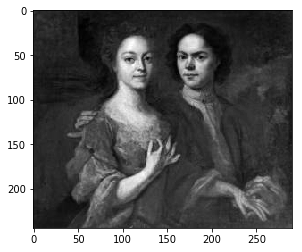

In [53]:
plt.imshow(gray_img, cmap="gray")

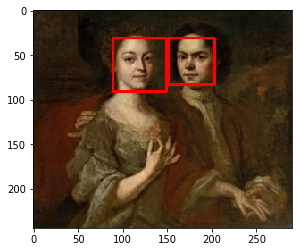

In [54]:

faces = face_classifier.detectMultiScale(gray_img, scaleFactor=1.2, minNeighbors=5)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [55]:
def getFaces(path, scaleFactor = 1.2):
    """
    (String, Int) -> (faces[numpy])
    Precondition: path denotes an image that exists
    Returns a list of faces found in the image if none
    are found returns and empty list
    """
    img = cv.imread(path)
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_img, scaleFactor=scaleFactor, minNeighbors=5)
    
    face_arr = []

    for (x,y,w,h) in faces:
        face_arr.append(img[y:(y+h), x:(x+w)])


    return face_arr

In [57]:
a = getFaces("/home/sam/Downloads/art-images-drawings-painting-sculpture-engraving/dataset/dataset_updated/training_set/painting/0072.jpg")

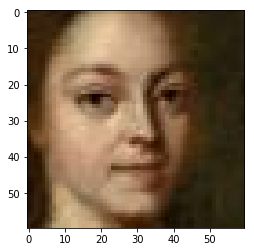

In [61]:
plt.imshow(cv.cvtColor(a[1], cv.COLOR_BGR2RGB))

In [6]:
files = os.listdir(PATH)
width = []
height = []
count = 0
corruptedCount = 0
face_classifier = cv.CascadeClassifier("/home/sam/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_alt.xml")
no_faces_found = 0
faces_found = 0
for file in files:
    if file[-3:] == "jpg":
        try: 
            img = cv.imread(PATH + file)
            gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            if count % 100 == 0: print(count, "images processed")
            faces = face_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
            if (len(faces) == 0):
                no_faces_found += 1
            else:
                faces_found += 1
            for (x, y, w, h) in faces:
                width.append(w)
                height.append(h)

            count += 1
        except:
            corruptedCount += 1

print("Found", count, "usable images and", corruptedCount, "corrupted files")
print(str(no_faces_found) + " files did not have faces. ")
print("A total of " + str(faces_found) + " faces.")

0 images processed
100 images processed
200 images processed
300 images processed
400 images processed
500 images processed
600 images processed
700 images processed
800 images processed
900 images processed
1000 images processed
1100 images processed
1200 images processed
1300 images processed
1400 images processed
1500 images processed
1600 images processed
1700 images processed
1800 images processed
1900 images processed
2000 images processed
Found 2042 usable images and 81 corrupted files
594 files did not have faces. 
A total of 1448 faces.


In [37]:
faces

array([[116,  86,  91,  91],
       [ 98,  46,  95,  95]], dtype=int32)

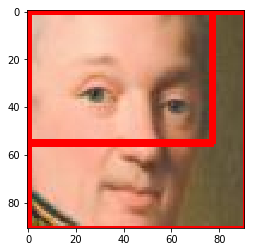

In [38]:

plt.imshow(cv.cvtColor(img[86:(86+91), 116:(116+91)], cv.COLOR_BGR2RGB))

In [18]:
img.shape

(361, 290, 3)

In [29]:
img[40:(40+70), 113:183].shape

(70, 70, 3)

In [28]:
faces

array([[113,  40,  70,  70]], dtype=int32)